<a href="https://colab.research.google.com/github/redrum88/tensorflow/blob/colabs/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps in modelling with TensorFlow
* Get data ready (turn into tensors)
* Build or pick a pretrained model (to suit your problem)
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload your trained model


# What is regression problem?

Example regression problems
* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should i save each week for fuel?




# What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.


In [120]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

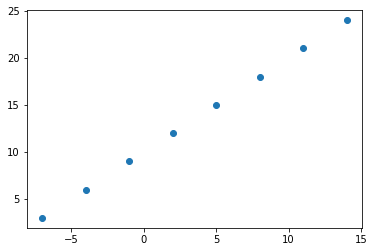

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [122]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [123]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [124]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [125]:
X[0], y[0]

(-7.0, 3.0)

In [126]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [127]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps i modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our mode).
3.**Fitting a model** - letting the model try to find patters between X & y (features and labels).

In [128]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))


model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

model = tf.keras.Sequential
model.add(tf.keras.layers.Dense(1))

TypeError: ignored

In [129]:


# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradien descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 296ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [130]:
# Turn our NumPy arrays into tensors dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [131]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [132]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 56ms/step


array([[12.716021]], dtype=float32)

In [133]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [134]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
# Before we trained with `5` epochs and now we'll train with increased epochs then before.

Epoch 1/100
1/1 [==============================] - 0s 279ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [135]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [136]:
# Let's see if our model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 51ms/step


array([[29.739855]], dtype=float32)

In [137]:
# Let's try add layer

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics="mae")

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 887ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4673 - m

In [138]:
# Make prediction
model.predict([17.])

1/1 [==============================] - 0s 57ms/step


array([[26.583532]], dtype=float32)

In [139]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 13.2879 - mae: 13.2879
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6519 - mae: 12.6519
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.0066 - mae: 12.0066
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3415 - mae: 11.3415
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6548 - mae: 10.6548
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9252 - mae: 9.9252
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1130 - mae: 9.1130
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1750 - mae: 8.1750
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.1739 - mae: 7.1739
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.9778 - mae: 5.9778
Epoch 11/100
1/1 [==============================] - 0s 15ms/step

In [140]:
model.predict([17.])

1/1 [==============================] - 0s 98ms/step


array([[31.602213]], dtype=float32)

In [141]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [142]:
# Let's try to make a prediction
model.predict([17.])

1/1 [==============================] - 0s 29ms/step


array([[31.602213]], dtype=float32)

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```




When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model = how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against  the ground truth (the original labels)?

In [143]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [144]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

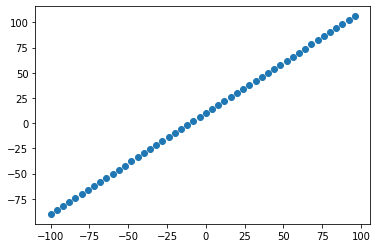

In [145]:
# Visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 7-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [146]:
# Check the lenght of how many samples we have
len(X)

50

In [147]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

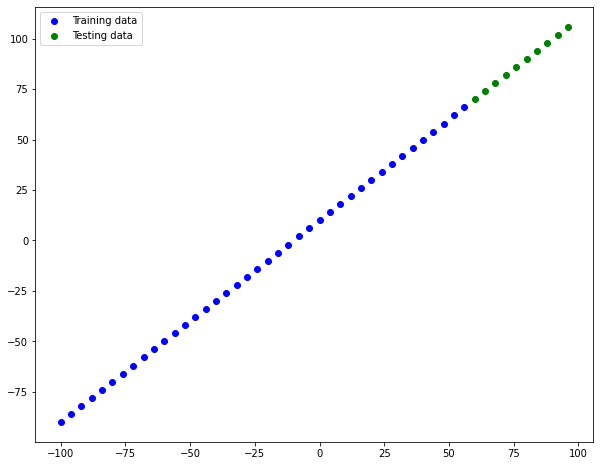

In [148]:
plt.figure(figsize=(10, 8))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [149]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 90.5424 - mae: 90.5424
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 55.0869 - mae: 55.0869
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 18.8117 - mae: 18.8117
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1430 - mae: 10.1430
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1354 - mae: 11.1354
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2855 - mae: 10.2855
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2888 - mae: 9.2888
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2041 - mae: 9.2041
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8460 - mae: 11.8460
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 13.7814 - mae: 13.7814
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

### Visualizing the model

In [150]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [151]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [152]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patters) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patters or parameters from other models during **transfer learning**)

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⚒️**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [153]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [154]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [155]:
from tensorflow.keras.utils import plot_model


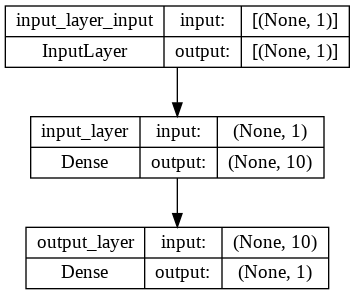

In [156]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [157]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [158]:
# Plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 8))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

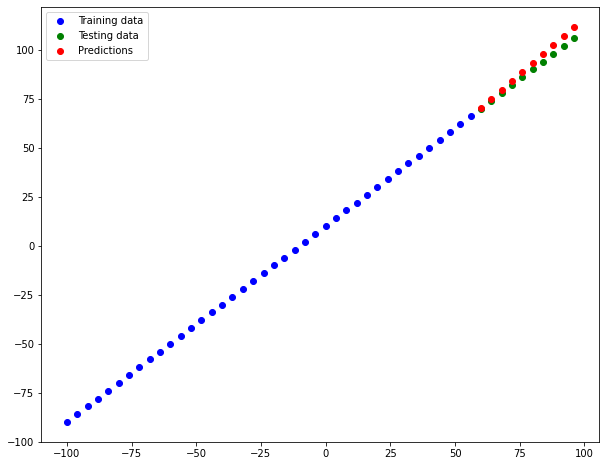

In [159]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors" 

In [160]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [161]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558252 , 14.1160555, 11.708944 , 10.336931 , 10.       ,
       10.698161 , 12.447113 , 15.332995 , 19.253975 , 23.84169  ],
      dtype=float32)>

In [162]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [163]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [164]:
# Calculate mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [165]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))
  

In [166]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [167]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patters in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. 
5. 

**Build `model_1`**

In [168]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mse: 343.1160
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mse: 161.7596
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mse: 162.4522
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mse: 134.4796
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mse: 123.8305
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mse: 94.0297
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5704 - mse: 101.2438
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mse: 88.5497
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mse: 518.2997
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mse: 128.1340
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 46ms/step


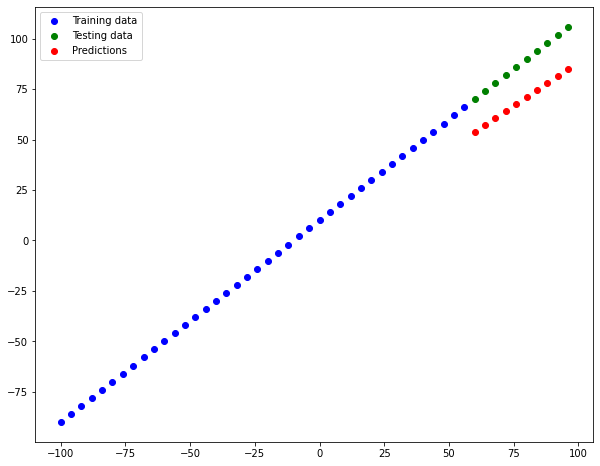

In [169]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [170]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [171]:
# Model: model_2
tf.random.set_seed(42)

# Create a model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model_2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 44ms/step


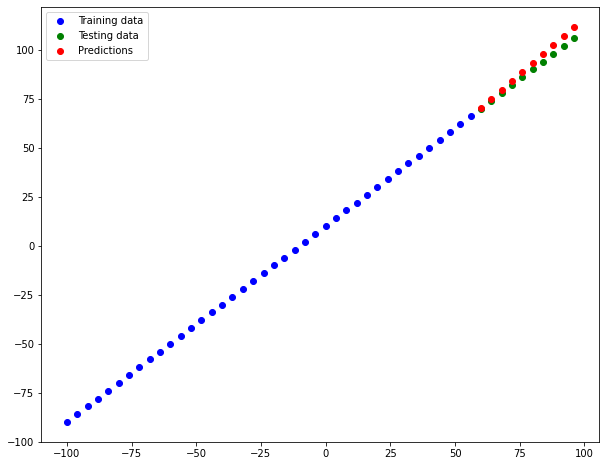

In [172]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [173]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [174]:
# Model: model_3
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/500
2/2 [==========================

1/1 [==============================] - 0s 48ms/step


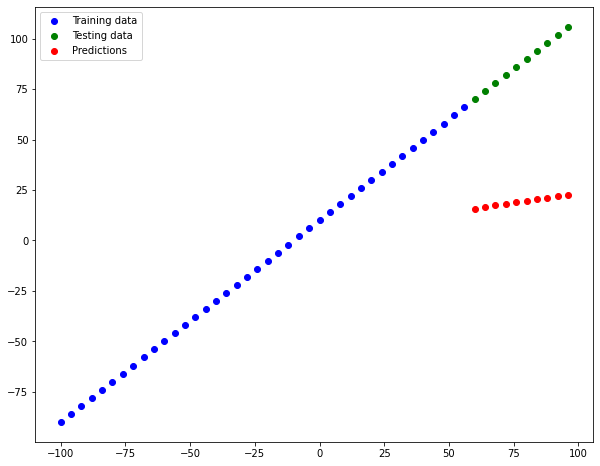

In [175]:
# Make predictions and plot
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [176]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [177]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


Looks liek `model_2` performed the best...

In [178]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: 
> "experiment, experiment, experiment!".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖**Resource:** As you build more models, you'll want to look into using:

* TensorBoard -  a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving the model

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

https://www.tensorflow.org/guide/keras/save_and_serialize

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [179]:
# Saving model using the SavedModel format
model_2.save("/content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format")

In [180]:
# Saving model using the HDF5 format
model_2.save("/content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format.h5")

### Loading the same model

In [186]:
# Load in the SavedModel format
loaded_model_SM = tf.keras.models.load_model("/content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format")

In [187]:
# Load in the HDF5 format
loaded_model_H5 = tf.keras.models.load_model("/content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format.h5")

In [189]:
loaded_model_SM.predict(X_test)

1/1 [==============================] - 0s 42ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [191]:
model_2.predict(X_test)

1/1 [==============================] - 0s 43ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [198]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_model_SM.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 16ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [197]:
model_2_preds.squeeze() == loaded_SavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [195]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [199]:
loaded_model_H5.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [200]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [201]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_model_H5_preds = loaded_model_H5.predict(X_test)
model_2_preds == loaded_model_H5_preds

1/1 [==============================] - 0s 34ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file)

If you want to download your files from Google Colab:

1. You can go to `Files` tab and right click on the file you're after and click `Download`.
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd cell below).

In [202]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
# Saving a file from Gogle Colab to Google Drive (requires mounting Google Drive)
!cp /content/drive/MyDrive/TENSORFLOW/best_model_SavedModel_format.h5 /content/drive/MyDrive

## A larger example

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [204]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [206]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [207]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [209]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [210]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]



In [222]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [221]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [219]:
# Create training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)
# Create model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# Fit the model
insurance_model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10967.0283 - mae: 10967.0283
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

In [227]:
# Check the results of the insurance model on the test data
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8921.2812 - mae: 8921.2812


[8921.28125, 8921.28125]

In [230]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer

In [259]:
# Let's try adding more layers
tf.random.set_seed(42)
# Create model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12110.98

In [256]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8678.6289 - mae: 8678.6289


[8678.62890625, 8678.62890625]

In [260]:
# Let's try adding more layers
tf.random.set_seed(42)
# Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12110.98

In [261]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8632.2910 - mae: 8632.2910


[8632.291015625, 8632.291015625]

In [262]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 5ms/step - loss: 8627.9434 - mae: 8627.9434


[8627.943359375, 8627.943359375]

In [267]:
# Plot history (also known as a loss curve  or a training curve)

# pd.DataFrame(history.history).plot()
# plt.ylabel("loss")
# plt.xlabel("epochs")

🤔**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once improving a certain metric.

## Preprocessing data (normalization and standardization)